In [1]:
import gym

# Trading Framework

This framework is developed based on Tito Ingargiola's amazing work on https://github.com/hackthemarket/gym-trading. 

In [2]:
import gym_trading
from gym_trading.envs.Q_learning import Q

C:\Users\Henry\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)



First, define the address for the CSV data


In [3]:
csv = r"GBPUSD60.csv"

# Create a new OpenAI Gym environment with the customised Trading environment



 .initialise_simulator() must be invoked after **env.make('trading-v0')** . Within this function, provide these arguments:


* **csv**: Address of the data


* **ATR**: True/ False, (The only indicator available now)



* **trade_period**: (1 - 10), Holding period for each trades. *Default: 1*


* **train_split**: (0.0,1.0), Percentage of data set for training. *Default: 0.7*

In [4]:
env = gym.make('trading-v0')
env.initialise_simulator(csv, ATR=True, trade_period=5, train_split=0.7)

[2017-06-18 04:40:02,124] Making new env: trading-v0


Please invoke .initialise_simulator() method next to complete initialization


# States map

states_map is a discretized observation space bounded by the extreme values Return and ATR, with an interval of 0.5. For every new observation (Return, ATR) tuple pair, it is approximated to the closest pair on states_map. States_map corresponds to the row index of lookup_table

In [5]:
env.sim.states

array([[-0.57315451,  0.57459856],
       [ 0.00848602,  0.39866147],
       [-0.26898065,  0.32982467],
       ..., 
       [-0.04439234, -0.59639615],
       [ 0.14455142, -0.71495003],
       [ 0.45068647, -0.78433391]])

# Next, Create Q_learning framework

This framework wraps around the trading environment.

Arguments:

* **env**: gym_trading Environment

* **train_episodes**: Number of train episodes to update Q_table

* **learning_rate**: *Default: 0.2*

* **gamma**: *Default: 0.9* 

    Upon initializing, Q_learning has zeroed Q_table **lookup_table** and **states_map**
    
 


In [6]:
Q_learning = Q(env, train_episodes=1000, learning_rate=0.2, gamma=0.9)

# States_map
**states_map** is a discretized observation space bounded by the extreme values *Return* and *ATR*, with an interval of 0.5.
For every new observation *(Return, ATR) tuple pair*, it is approximated to the closest pair on **states_map**.  **States_map** corresponds to the row index of **lookup_table**


In [7]:
Q_learning.states_map

array([[-9. , -3. ],
       [-9. , -2.5],
       [-9. , -2. ],
       ..., 
       [ 8. ,  4. ],
       [ 8. ,  4.5],
       [ 8. ,  5. ]])

# Q Table
**lookup_table** has row size the length of **states_map** and column size of 3 (actions (0,1,2).).

In [8]:
Q_learning.lookup_table

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

All zero now, not trained yet

# Training

Filling up the Q Table

In [9]:
Q_learning.train()

Training period  2016-11-29 02:00:00 - 2017-03-24 09:00:00
End of Episode 1, Reward is -1.07791164659
End of Episode 2, Reward is -0.10404040404
End of Episode 3, Reward is -2.85939849624
End of Episode 4, Reward is 0.0611111111111
End of Episode 5, Reward is -3.95520231214
End of Episode 6, Reward is -1.92788203753
End of Episode 7, Reward is -4.63010204082
End of Episode 8, Reward is -5.22564102564
End of Episode 9, Reward is -5.05732984293
End of Episode 10, Reward is -4.16771653543
End of Episode 11, Reward is -5.44888178914
End of Episode 12, Reward is -2.09073482428
End of Episode 13, Reward is -4.05620915033
End of Episode 14, Reward is -3.47340720222
End of Episode 15, Reward is -3.80131926121
End of Episode 16, Reward is -1.44120603015
End of Episode 17, Reward is -1.25428571429
End of Episode 18, Reward is -1.52015503876
End of Episode 19, Reward is -2.80952380952
End of Episode 20, Reward is -1.69836065574
End of Episode 21, Reward is -1.04957983193
End of Episode 22, Reward

After Training, Q Table is complete

In [10]:

Q_learning.lookup_table[Q_learning.lookup_table!=0]

array([ -9.79270903e-01,   1.12342724e+02,  -3.59839263e+00,
         1.26364385e+02,  -4.88906239e+00,  -1.76522405e+00,
         1.03392947e+02,   1.15532471e+02,  -3.50827523e+00,
        -4.07318335e+00,   8.03857118e+01,  -1.51994026e+01,
        -6.47004033e-01,  -3.49367070e+00,   1.16998714e+02,
         1.24405023e+02,  -1.01720392e+00,  -2.78210806e+00,
         2.89780720e-01,   1.11639925e+02,  -5.63789957e+00,
         6.67639520e+01,  -7.57617192e+00,  -2.42192373e+01,
         6.97621799e+01,  -1.33023308e+01,  -1.71889490e+01,
         1.07110565e+01,  -7.33746940e+00,   6.47775547e+01,
        -5.16146573e+00,  -2.74487938e+00,   8.58051376e+01,
        -2.39126479e+00,   1.00893019e+02,  -1.43951187e+01,
        -6.22250149e-01,  -7.36710358e-01,   1.19573744e+02,
        -1.58375343e+00,   1.18347660e+02,   5.28401173e+01,
        -3.00497922e+00,  -1.58368450e+01,   8.80912422e+01,
        -1.36414918e+01,  -2.22951434e+01,  -8.28860275e+00,
         7.93250508e+01,

# Testing

Testing the new Q Table on unseen data. 
* Q Table is not updated on Testing mode

In [12]:
Q_learning.test(100)

End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is -6.5661971831
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is -0.531746031746
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is 0.308064516129
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is 1.76551724138
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is 10.7785714286
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is 4.68333333333
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is 4.68333333333
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is 4.68333333333
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is 9.85652173913
End of Test Period from 2017-03-24 10:00:00 to 2017-05-12 23:00:00, Average Reward is 4.683333333

SUMMARY STATISTICS
Total Trades Taken:  19
Total Reward:  137.79999999999276
Average Reward per Trade:  7.25263157895
Win Ratio: 52.6315789474 %


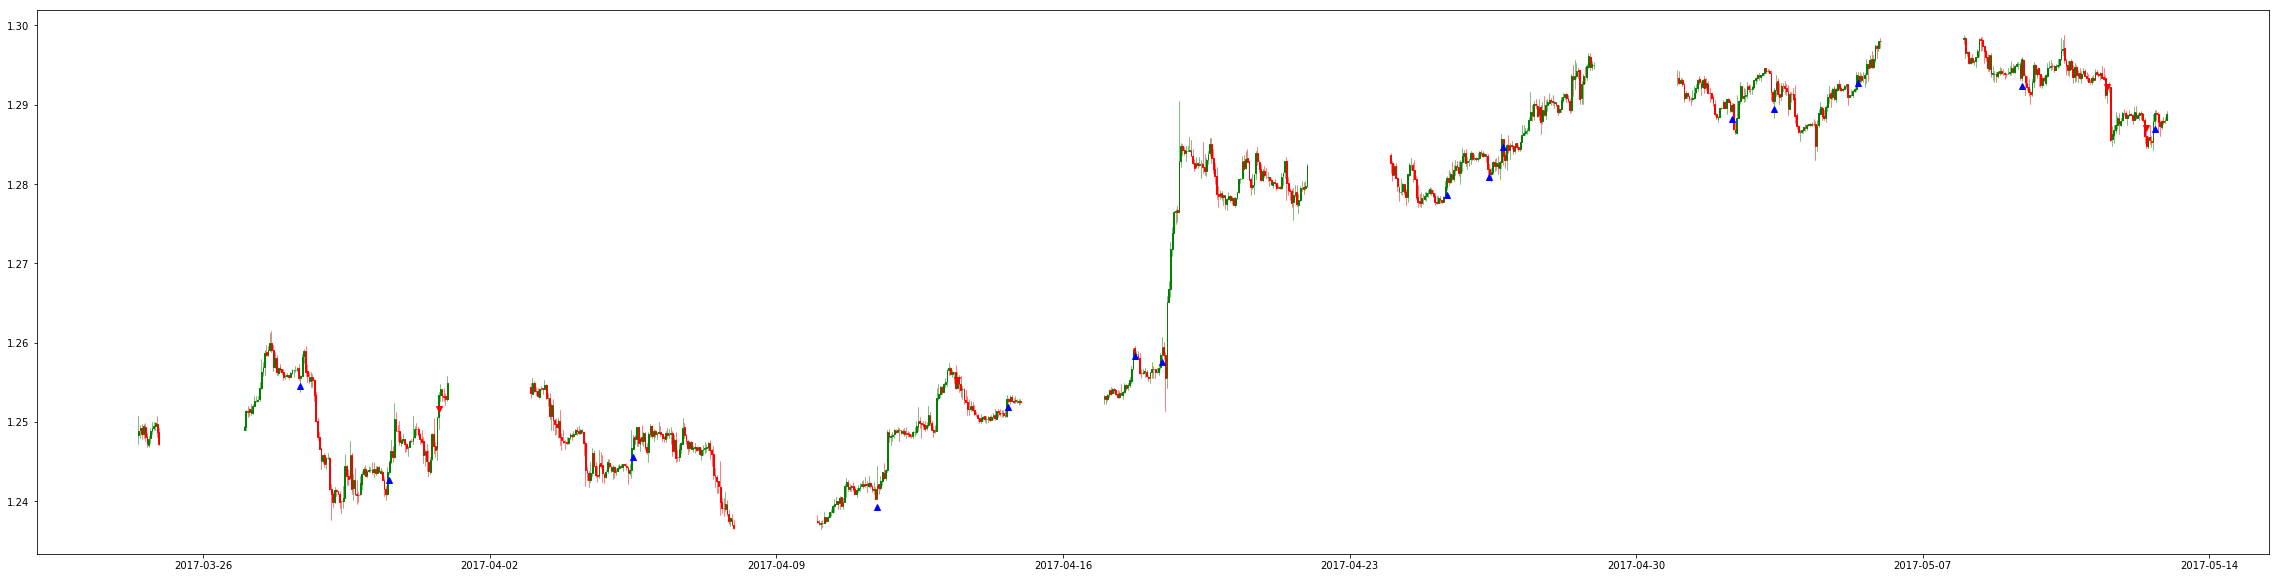

In [14]:
Q_learning._generate_summary_stats()

All trade entries are kept in env.portfolio.journal

In [ ]:
env.portfolio.journal